In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/admissions.csv"
AdmissionData = pd.read_csv(url)
print(AdmissionData.head(5))
print(AdmissionData.describe())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [3]:
# Let's get rid of Missing values - there are only a few missing values so, let's drop them all
AdmissionData.dropna(inplace = True)
AdmissionData.describe() # Only 3 rows are dropped

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Our goal is to predict Admission based on 3 variables (gre, gpa, prestige). We do need to standardize our data first, otherwise, GRE would have more weight than GPA and prestige. This is one of the most important steps!

In [4]:
# Let's write our own Standardizing function
# Alternatively we could simply Scale our data by importing preprocessing 
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X - X_Min)/(X_Max - X_Min)
    return X_Standardized



In [5]:
for i in ['gre','gpa','prestige']:
    AdmissionData[i] = Standardize(AdmissionData[i])

AdmissionData.head(5)

,admit,gre,gpa,prestige
0,0,0.275862,0.775862,0.666667
1,1,0.758621,0.810345,0.666667
2,1,1.000000,1.000000,0.000000
3,1,0.724138,0.534483,1.000000
4,0,0.517241,0.385057,1.000000


In [6]:
from sklearn import neighbors, metrics

In [7]:
X = AdmissionData[['gre','gpa','prestige']]
y = AdmissionData['admit']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
#n_neighbors is number of neighbors you would like to search 
#weights can be set to 'uniform' or 'distance'
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### You can measure accuracy of your prediction either by manually computing it or using knn.score

In [8]:
Score1 = knn.score(X, y)

y_hat = knn.predict(X)
Score2 = float(sum(y_hat == y))/len(AdmissionData)

print(Score1)
print(Score2)

0.76322418136
0.76322418136


#### What is the optimal number of neighbors?

To answer this question we do need to rely on validation or corss-validation error. 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation




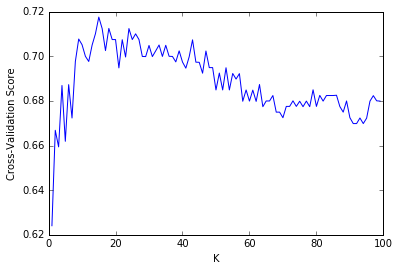

In [10]:
from sklearn.cross_validation import cross_val_score

CV_Scores = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
    CV_Scores.append(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean())    

plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation Score")
plt.show()

#### How was the fit? What is the best we can do?

The best accuracy we can get is around 71 to 72 percent. It may be tempting to conclude this is a good result. But let's compare this algorithm with an easier one! Let's use a prediction model with prediction of rejection for everyone. Let's compare KNN result with that terrible predictor!

In [11]:
sum(AdmissionData['admit'])
float(len(AdmissionData) - sum(AdmissionData['admit'])) / len(AdmissionData)

0.6826196473551638

That **Stupid** algorithm had accuracy of 68 percent!

#### Now let's see how changing 'unifrom' to 'distance' would affect our results

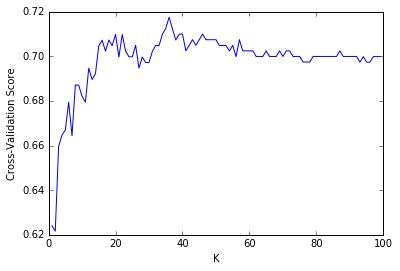

In [12]:
CV_Scores = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights= 'distance')
    CV_Scores.append(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean())    

plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation Score")
plt.show()

It doesn't show a brighter picture!

#### What would be the result before standardizing your data?

In [13]:
AdmissionData = pd.read_csv(url)
AdmissionData.dropna(inplace = True)
X = AdmissionData[['gre','gpa','prestige']]
y = AdmissionData['admit']

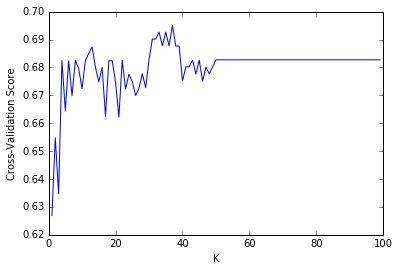

In [14]:
CV_Scores = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
    CV_Scores.append(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean())    

plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation Score")
plt.show()


It actually, gives you worse results!

## KNN and Regression Models

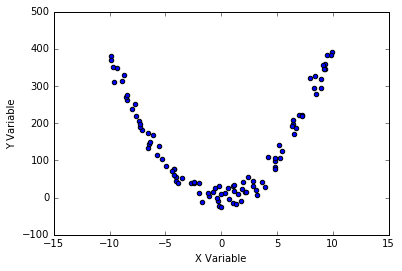

In [15]:
import random
# let's use the simulated model we used in Lecture 6
#Let's generate 100 random numbers between -10 and 10
x = np.zeros(100)
for i in range(100):
   x[i] = random.uniform(-10, 10)

#Let's generate some error term with mean 0 and s.d. = 20
error = np.random.normal(0,20,100)
#Now let's generate y with a polynomial degree 2 relationship with x

y = 3 + 1.5 * x + 4 * (x ** 2) + error

df = pd.DataFrame({'X': x, 'y': y})


plt.scatter(x, y)
plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.show()



In [16]:
# Let's check 20-nearest neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 20, weights='uniform')
df = df.sort_values(by = 'X')
X = df[['X']]
y = df['y']


knn.fit(X,y)
y_hat = knn.predict(X)

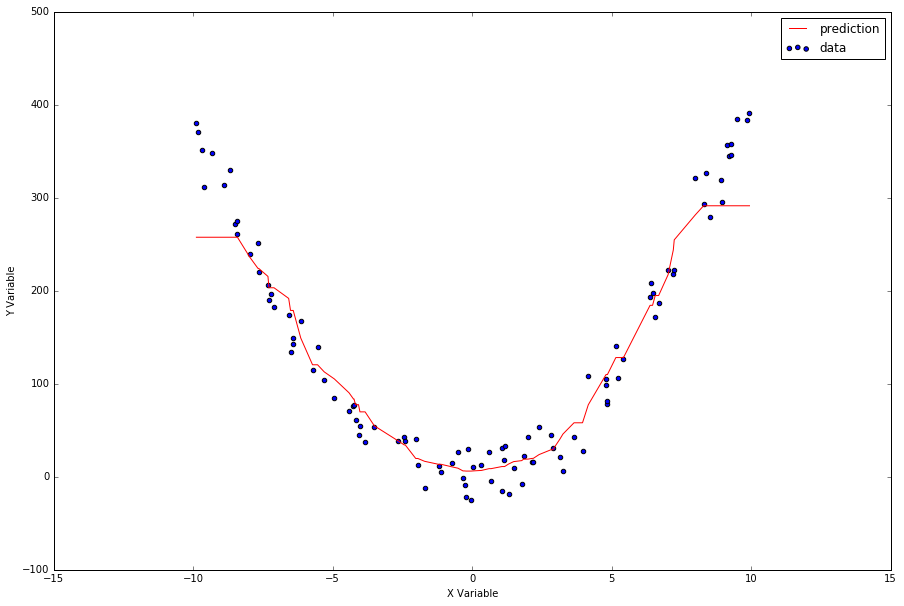

In [17]:
plt.figure(figsize = (15,10))

plt.scatter(X, y, label='data')
plt.plot(X, y_hat, c = 'r',label='prediction')
plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend()
plt.show()

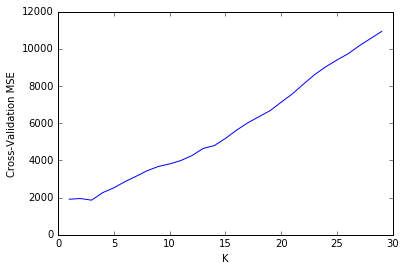

In [18]:
CV_Scores = []
RangeOfK = range(1,30)

for k in RangeOfK:
    knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'uniform')
    CV_Scores.append( -cross_val_score(knn, X, y, cv=10,
                                    scoring = 'mean_squared_error').mean())    


plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation MSE")
plt.show()

In [33]:
print(np.argmin(CV_Scores))
print(CV_Scores)
#This is how you can call the element in K that minimizes CV_Score
print(RangeOfK[np.argmin(CV_Scores)]) 

2
[2423.033534385394, 2502.3933824304013, 2313.5308155369767, 2471.7969797786927, 2636.1918669041952, 2999.2875929469492, 3437.6181398483577, 3831.5488485060587, 4036.3212055979616, 4235.2220375531051, 4495.7407657722997, 4762.3044931718714, 5131.9205699313798, 5566.5631949293729, 6004.6215911105846, 6395.6821790785662, 6876.7917661573883, 7331.4864726949427, 7744.1892986688499, 8196.3718344451445, 8610.3413759087089, 9174.0596322593592, 9582.0229707790622, 10187.86236078253, 10609.087576939526, 11045.389635513498, 11520.567887891833, 12114.554057511832, 12596.753358968423]
3


It seems like k between 2 to 5 gives you the best result. let's look at the graph after setting k = 3

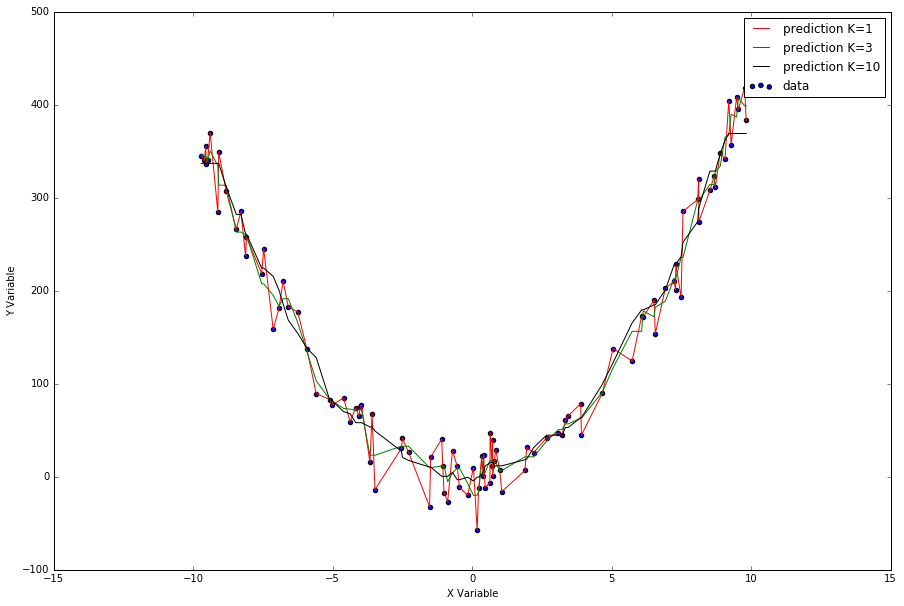

In [32]:

knn = neighbors.KNeighborsRegressor(n_neighbors = 3, weights='uniform')

df = df.sort_values(by = 'X')
X = df[['X']]
y = df['y']

knn_1 = neighbors.KNeighborsRegressor(n_neighbors = 1, weights='uniform')
knn_3 = neighbors.KNeighborsRegressor(n_neighbors = 3, weights='uniform')
knn_10 = neighbors.KNeighborsRegressor(n_neighbors = 10, weights='uniform')


knn_1.fit(X,y)
y_hat_1 = knn_1.predict(X)

knn_3.fit(X,y)
y_hat_3 = knn_3.predict(X)

knn_10.fit(X,y)
y_hat_10 = knn_10.predict(X)


plt.figure(figsize=(15,10))
plt.scatter(X, y, label='data')
plt.plot(X, y_hat_1, c = 'r',label='prediction K=1')
plt.plot(X, y_hat_3, c = 'g',label='prediction K=3')
plt.plot(X, y_hat_10, c = 'k',label='prediction K=10')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend()
plt.show()

### Important Note: In this example we did not standardize our observations because we only had one variable.